# Robust shaper zeros validation

Consider the input shaper represented with the following transfer function

$$
S(s) = \gamma + \frac{1}{s} \sum\limits_{k=1}^{n} a_{k} e^{-s\tau_k}
$$

In [1]:
import logging
import numpy as np
import matplotlib.pyplot as plt
from qpmr import qpmr

logger = logging.getLogger("qpmr")
logger.setLevel(logging.DEBUG)
handler = logging.StreamHandler()
formatter = logging.Formatter("%(asctime)s - %(name)s - %(levelname)s - %(message)s")
handler.setFormatter(formatter)
logger.addHandler(handler)

In [2]:
T = 0.4
gamma = 0.25
a = np.array([0.0021, 0.5170, 1.1402, 1.3194, 1.0347,
              0.4305, -0.2457, -0.7440, -0.9116, -0.7504,
              -0.4075, -0.0992, -0.0004, -0.1478, -0.4044,
              -0.5105, -0.2114, -0.0108, 0.0029, -0.0031])

In [3]:
n = len(a)
delays = np.linspace(0, T, n)
coefs = np.c_[np.zeros(n), a]
coefs[0,0] = gamma

In [18]:
region = [-20, 5, 0, 250]
roots, meta = qpmr(region, coefs, delays, numerical_method="newton", ds=1.0)

2024-04-17 22:22:41,918 - qpmr.qpmr_v2 - DEBUG - Estimated size of complex grid = 131584.0 bytes
2024-04-17 22:22:41,936 - qpmr.numerical_methods - DEBUG - Numerical Newton converged in 5/100 steps, last MAX(|res|) = 9.552839109005624e-11
2024-04-17 22:22:41,937 - qpmr.argument_principle - DEBUG - Enlarging region from region=[-20, 5, 0, 250] to reg=[-20.1, 5.1, -0.1, 250.1]
2024-04-17 22:22:41,965 - qpmr.argument_principle - DEBUG - Using argument principle, contour integral = 13.022236274560914 | rounded to 13.0
2024-04-17 22:22:41,965 - qpmr.argument_principle - DEBUG - Enlarging region from region=[-19.9, 4.9, 0.1, 249.9] to reg=[-20.0, 5.0, 0.0, 250.0]
2024-04-17 22:22:41,996 - qpmr.argument_principle - DEBUG - Using argument principle, contour integral = 13.02240478461366 | rounded to 13.0


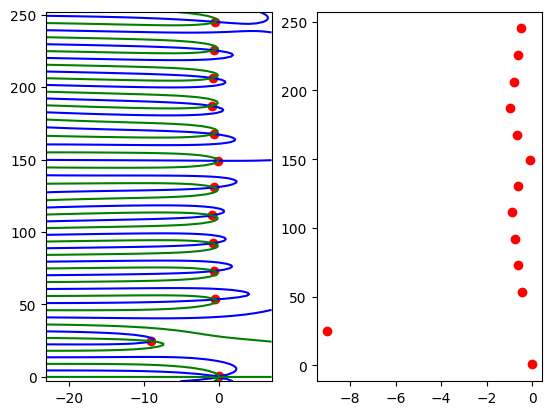

In [19]:
complex_grid = meta.complex_grid
value = meta.z_value

plt.figure()

plt.subplot(121)
plt.contour(np.real(complex_grid), np.imag(complex_grid), np.real(value), levels=[0], colors='blue')
plt.contour(np.real(complex_grid), np.imag(complex_grid), np.imag(value), levels=[0], colors='green')
plt.scatter(np.real(roots), np.imag(roots), marker="o", color="r")

plt.subplot(122)
plt.scatter(np.real(roots), np.imag(roots), marker="o", color="r")
plt.show()